In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mydata = pd.read_csv("Mall_Customers.csv")
mydata.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
iv = mydata[['Annual Income (k$)','Spending Score (1-100)']]

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2 , init = 'k-means++' , n_init =10 ,max_iter =300 , random_state =0 )

In [6]:
kmeans.fit(iv)
kmeans.predict(iv)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [7]:
## Code to find within sum of squares
wccs= []
for i in range(1,11) :
    kmeans = KMeans(n_clusters = i , init = 'k-means++' , n_init =10 ,max_iter =300 , random_state =0 )
    kmeans.fit(iv)
    wccs.append(kmeans.inertia_)            

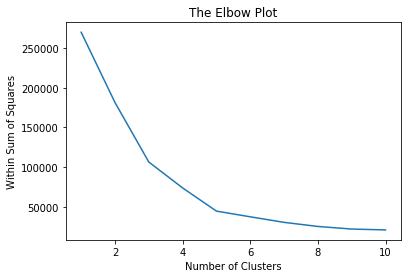

In [8]:
## Plotting the Within Sum of Squares
plt.plot(range(1,11),wccs)
plt.title("The Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Sum of Squares")
plt.show()

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5 , init = 'k-means++' , n_init =10 ,max_iter =300 , random_state =0 )
kmeans.fit_predict(iv)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [10]:
## Vizualizing the Clusters
iv['cluster']=kmeans.fit_predict(iv)


C:\Users\arunn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


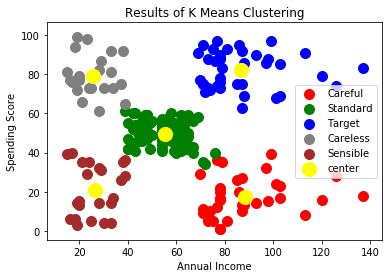

In [15]:
## Cluster Plot
plt.scatter(iv.loc[iv['cluster']==0,'Annual Income (k$)'],iv.loc[iv['cluster']==0,'Spending Score (1-100)'],s=100,c='red',label='Careful')
plt.scatter(iv.loc[iv['cluster']==1,'Annual Income (k$)'],iv.loc[iv['cluster']==1,'Spending Score (1-100)'],s=100,c='green',label='Standard')
plt.scatter(iv.loc[iv['cluster']==2,'Annual Income (k$)'],iv.loc[iv['cluster']==2,'Spending Score (1-100)'],s=100,c='blue',label='Target')
plt.scatter(iv.loc[iv['cluster']==3,'Annual Income (k$)'],iv.loc[iv['cluster']==3,'Spending Score (1-100)'],s=100,c='grey',label='Careless')
plt.scatter(iv.loc[iv['cluster']==4,'Annual Income (k$)'],iv.loc[iv['cluster']==4,'Spending Score (1-100)'],s=100,c='brown',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=200,c='yellow',label='center')
plt.title("Results of K Means Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()



In [18]:
iv[(iv['cluster']==4) & (iv['Spending Score (1-100)']>4)][['Spending Score (1-100)','cluster']]

,Spending Score (1-100),cluster
0,39,4
2,6,4
4,40,4
6,6,4
10,14,4
12,15,4
14,13,4
16,35,4
18,29,4
20,35,4


In [16]:
import tensorflow as tf

C:\Users\arunn\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [17]:
# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# Print the result
print(result)

Tensor("Mul:0", shape=(4,), dtype=int32)


In [18]:
# Intialize the Session
sess = tf.Session()

# Print the result
print(sess.run(result))

# Close the session
sess.close()

[ 5 12 21 32]
